## **Введение**

Данный проект представляет собой исследование рынка компьютерных игр, выполненное для интернет-магазина "Стримчик".

**Цель исследования:** провести анализ данных и выявить закономерности, влияющие на коммерческую успешность игры.

Для анализа представлены следующие данные:
- данные о **жанрах** игр;
- данные о **продажах в различных регионах**;
- данные об **оценках пользователей и экспертов**;
- данные о **рейтинге ESRB**.

## **Откройте файл с данными и изучите общую информацию**

In [130]:
# Импортируем необходимые библиотеки

import pandas as pd
import matplotlib as mpl
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
# Откроем файл с данными и сохраним в переменную data:

data = pd.read_csv ('/datasets/games.csv')

In [132]:
# Выведем на экран первые 10 строк датасета:

display (data.head (10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [133]:
# Выведем на экран общую информацию о датасете:

print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [134]:
# Проверим, содержит ли датасет пропуски в данных:

print (data.isna().sum()) 

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [135]:
#  Проверим датасет на наличие явных дубликатов: 
print (data.duplicated().sum())

0


**Вывод:** Мы видим, что датасет содержит пропуски в некоторых столбцах, а вот полных дубликатов нет. Что касается типов данных, то данные в ряде столбцов представлены в некорректных типах (например, значения в столбце Year_of_Release выражены вещественными числами, тогда как год может быть всегда только целым числом). Также хотелось бы отметить использование обоих регистров в названиях столбцов, что может усложнять восприятие данных и также требует обработки.

## **Подготовьте данные**

### **Названия столбцов**

In [136]:
# Приведем названия столбцов к нижнему регистру:

data.columns = data.columns.str.lower()
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


### **Типы данных**

In [137]:
# Приведем данные к нужным типам:

data.loc[~data['year_of_release'].isna(), 'year_of_release'] = data.loc[
    ~data ['year_of_release'].isna(), 'year_of_release'].astype ('int') 

print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


Мы заменили тип данных в столбце year_of_release (поскольку год выпуска - всегда целое число).

### **Пропуски**

In [138]:
# Проверим количество пропусков в каждом столбце:

print (data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Мы видим, что есть как пропуски, которые нельзя адекватно восполнить (например, название игры, ее жанр, рейтинг или год выпуска), так и те, которые восполнить можно (оценка критиков и пользователей).

В первой группе случаев целесообразно использовать заглушку. 

In [139]:
# Заменим пропуски в столбцах name, year_of_release, genre и rating на unknown:

data ['name'] = data['name'].fillna ('unknown')
data ['genre'] = data['genre'].fillna ('unknown')
data ['rating'] = data['rating'].fillna ('unknown')

print (data.isna().sum())

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating                0
dtype: int64


В столбце user_score встречается значение 'tbd'. Скорее всего оно обозначает "to be determined" и таким образом отмечались данные, по которым не конкретизировано значение оценки пользователей. Для того чтобы выбрать оптимальный способ обработки этих значений, необходимо понять, сколько таких строк содержит датасет:

In [140]:
#Выведем на экран информацию о строках, содержащих "tbd" в столбце user_score:

display (data[data['user_score']=='tbd'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Мы видим, что таких строк больше 2000, то есть речь не о единичных строках, которые можно было бы безболезненно удалить из датасета. В таком случае представляется необходимым заменить это значение на пропуск (так как с точки зрения анализа данных оно не содержит никакой информации, равно как и пропуски).

In [141]:
# Заменим значение tbd на пропуск

data = data.replace ({'user_score':{'tbd':'Nan'}})
display (data[data['user_score']=='tbd'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


После преобразования можно изменить тип данных в этом столбце на float:

In [142]:
# Изменим тип данных в столбце user_score на float:

data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['user_score'] = data['user_score'].replace('tbd', np.nan)

### Суммарные продажи по всем регионам

In [143]:
# Добавим столбец total_sales с информацией о суммарных продажах во всех регионах:

data['total_sales'] = data['na_sales'] + data['eu_sales'] + data ['jp_sales'] + data ['other_sales']
display (data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


## **Проведите исследовательский анализ данных**

### Количество игр в различные годы

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

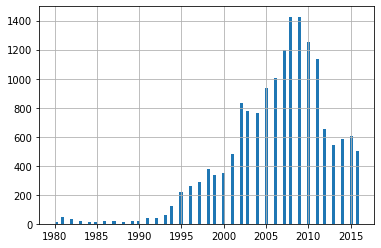

In [144]:
# Построим гистограмму и отразим количество выпускаемых игр в каждый год:

data['year_of_release'].hist(bins = 100)
data['year_of_release'].value_counts()

Мы видим, как число выпускаемых игр изменялось с течением времени. Первый скачок произошел в середине 1990-х гг (число выпускаемых игр увеличилось вдвое), затем наблюдался планомерный рост до конца десятилетия, а в начале 2000-х случилось еще одно удвоение показателя. Пикового значения число выпускаемых игр достигло в 2008-2009 гг, а затем стало снижаться и достигло в 2016 году значений 2001 года. 


### Динамика продаж на различных платформах и срок жизни платформ:

In [98]:
# Выведем на экран общее число продаж на каждой из платформ за все годы:

data.groupby ('platform')['total_sales'].sum().sort_values()

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       30.77
SAT       33.59
PSV       54.07
WiiU      82.19
2600      96.98
XOne     159.32
GC       198.93
SNES     200.04
N64      218.68
NES      251.05
GB       255.46
XB       257.74
3DS      259.00
PC       259.52
PSP      294.05
PS4      314.14
GBA      317.85
PS       730.86
DS       806.12
Wii      907.51
PS3      939.65
X360     971.42
PS2     1255.77
Name: total_sales, dtype: float64

Мы видим, что с большим отрывом лидируют следующие платформы: PS, DS, Wii, PS3, X360 и PS2. Посмотрим на динамику продаж на этих платформах по годам

In [99]:
# Создадим срез из исходного датасета с информацией о лидирующих платформах:

top_platforms = data.query ('platform == "PS" or platform == "DS" or platform == "Wii" or platform == "PS3" or platform == "X360" or platform == "PS2"')

# Построим распределение по годам для этих платформ:

top_per_year = top_platforms.pivot_table (index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
display (top_per_year)


platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985.0,0.02,NaN,NaN,NaN,NaN,NaN
1994.0,NaN,6.03,NaN,NaN,NaN,NaN
1995.0,NaN,35.96,NaN,NaN,NaN,NaN
1996.0,NaN,94.70,NaN,NaN,NaN,NaN
1997.0,NaN,136.17,NaN,NaN,NaN,NaN
1998.0,NaN,169.49,NaN,NaN,NaN,NaN
1999.0,NaN,144.53,NaN,NaN,NaN,NaN
2000.0,NaN,96.37,39.17,NaN,NaN,NaN
2001.0,NaN,35.59,166.43,NaN,NaN,NaN


In [100]:
# Посчитаем общее число ненулевых значений для каждой платформы:

display (len(top_per_year) - top_per_year.isna().sum())

platform
DS      11
PS      10
PS2     12
PS3     11
Wii     11
X360    12
dtype: int64

Таким образом на примере лидирующих по продажам платформ мы видим, что срок жизни одной платформы составляет **от 10 до 12 лет**.

### Актуальный период

Для целей анализа необходимо учитывать данные за последние 3 года, поскольку более ранние данные могут оказаться нерелевантными к текущим реалиям. Поэтому в качестве актуального периода будем рассматривать период 2014-2016 гг.

In [101]:
data = data.query('year_of_release >= 2014')
print (data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   float64
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(8), object(4)
memory usage: 171.5+ KB
None


In [102]:
# Выведем на экран список всех платформ из датасета:

data['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [103]:
# Посчитаем общее количество продаж по каждой из платформ за рассматриваемый период:

data.groupby ('platform')['total_sales'].sum().sort_values()

platform
PSP       0.36
Wii       5.07
PSV      22.40
PC       27.05
WiiU     42.98
X360     48.22
PS3      68.18
3DS      86.68
XOne    140.36
PS4     288.15
Name: total_sales, dtype: float64

Мы видим, что наибольшее количество продаж было на PS4 (свыше 280 млн копий), а наименьшее - у PSP (около 360 тыс. копий). Однако надо учитывать, что это данные за весь рассматриваемый период в совокупности и на протяжении 5 лет динамика могла быть различной.

In [104]:
# Построим сводную таблицу с разбивкой по годам для продаж на каждой из платформ:

sales_per_year = data.pivot_table (index = 'platform', columns = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
display (sales_per_year)

year_of_release,2014.0,2015.0,2016.0
platform,,,
3DS,43.76,27.78,15.14
PC,13.28,8.52,5.25
PS3,47.76,16.82,3.60
PS4,100.00,118.90,69.25
PSP,0.24,0.12,NaN
PSV,11.90,6.25,4.25
Wii,3.75,1.14,0.18
WiiU,22.03,16.35,4.60
X360,34.74,11.96,1.52


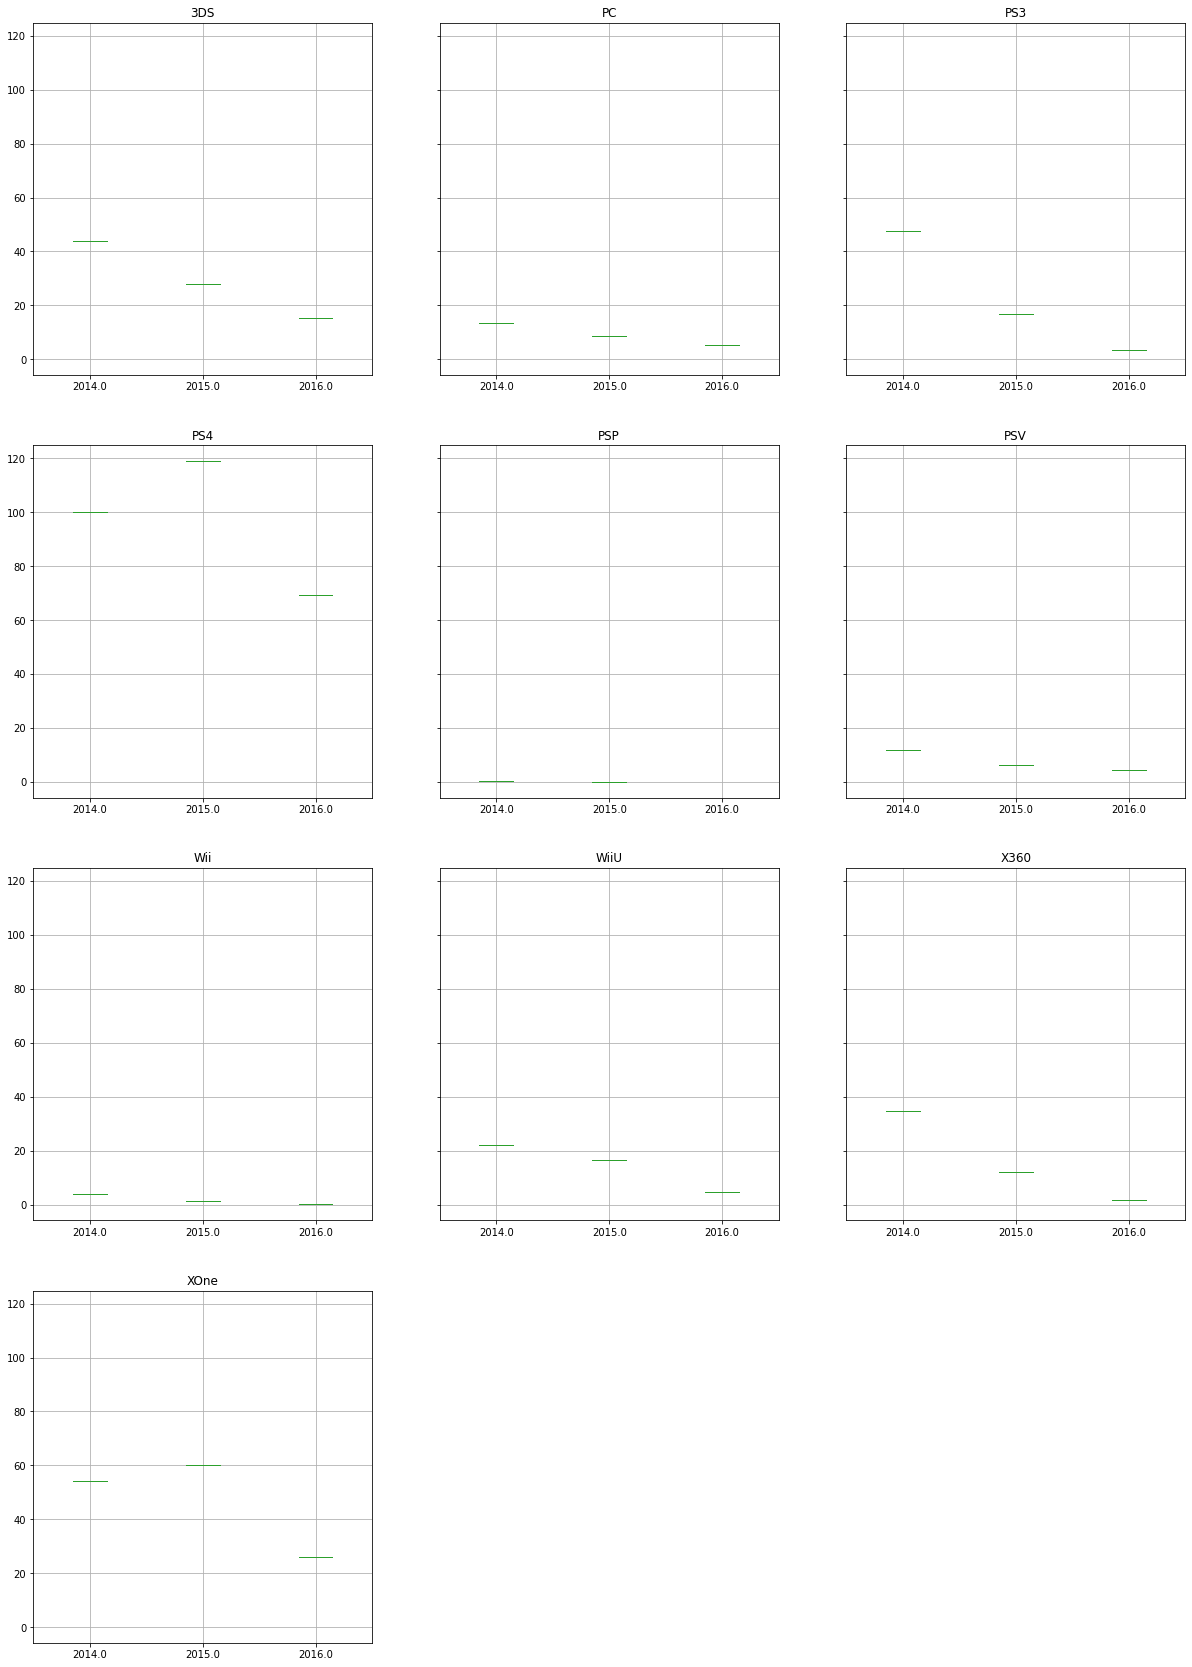

In [146]:
# Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

sales_per_year.groupby ('platform').boxplot(figsize = (20,30));

Теперь перед нами данные о динамике продаж для каждой платформы по годам. Так, мы видим взрывной рост продаж PS4 и XOne между 2013 и 2014 годами (в 4 и 3 раза соответственно), но основная тенденция - снижение количества продаж - актуальна для всех платформ без исключения.

Тем не менее можно выделить три лидирующие платформы: PS4, XOne и 3DS.

### Влияние на продажи отзывов пользователей и критиков

Сначала проверим взаимосвязь продаж и отзывов критиков для самой популярной платформы:

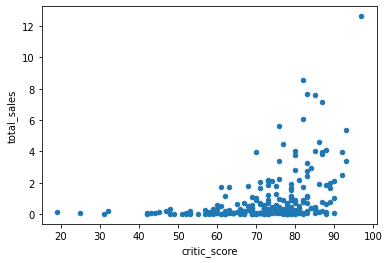

In [106]:
# Построим диаграмму рассеяния для продаж игр на платформе PS4 и отзывов критиков:

data [data['platform']=='PS4'].plot(x='critic_score', y='total_sales', kind='scatter');

In [107]:
# Посчитаем корреляцию между отзывами критиков и продажами для этой платформы:

data [data['platform']=='PS4']['critic_score'].corr (data [data['platform']=='PS4']['total_sales'])

0.40266141068104083

Мы видим, что перед нами слабая положительная корреляция, то есть с ростом оценки других пользователей растут продажи игры (хоть и незначительно). В целом наверное это логично: положительные отзывы на игру могут способствовать принятию решения о ее покупке.

Теперь посмотрим на зависимость продаж от отзывов пользователей:

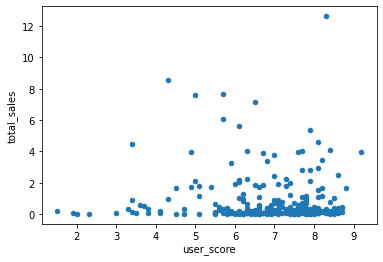

In [108]:
# Построим диаграмму рассеяния для продаж игр на платформе PS4 и отзывов пользователей:

data [data['platform']=='PS4'].plot(x='user_score', y='total_sales', kind='scatter');

In [109]:
# Посчитаем корреляцию между отзывами пользователей и продажами для этой платформы:

data [data['platform']=='PS4']['user_score'].corr (data [data['platform']=='PS4']['total_sales'])

-0.040131589472697356

А здесь корреляции практически нет.

Теперь проделаем то же самое для других платформ:

In [110]:
# Создадим переменную other_platforms и поместим в нее список с названиями остальных платформ:

other_platforms = data[data['platform']!= 'PS4']['platform'].unique()
print (other_platforms)

['3DS' 'XOne' 'WiiU' 'PS3' 'X360' 'PC' 'Wii' 'PSV' 'PSP']


Корреляция между отзывами критиков и продажами для 3DS : 0.314117492869051
Корреляция между отзывами критиков и продажами для XOne : 0.42867694370333226
Корреляция между отзывами критиков и продажами для WiiU : 0.370201412480884
Корреляция между отзывами критиков и продажами для PS3 : 0.44657460493190704
Корреляция между отзывами критиков и продажами для X360 : 0.5257228356581523
Корреляция между отзывами критиков и продажами для PC : 0.17463413769350036
Корреляция между отзывами критиков и продажами для Wii : nan
Корреляция между отзывами критиков и продажами для PSV : 0.04266490657009526
Корреляция между отзывами критиков и продажами для PSP : nan


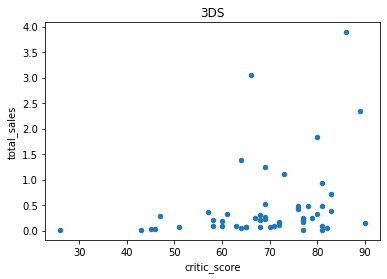

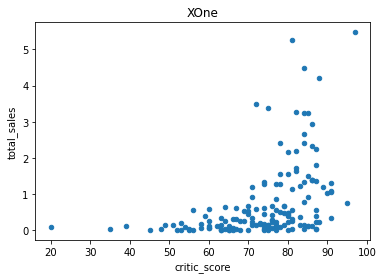

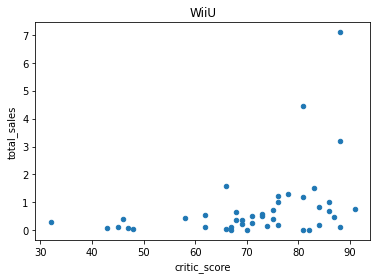

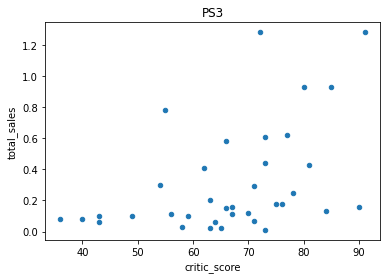

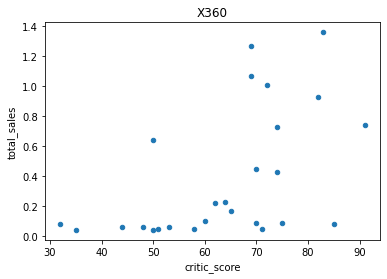

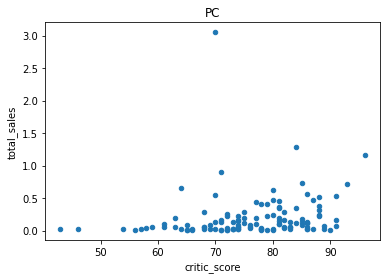

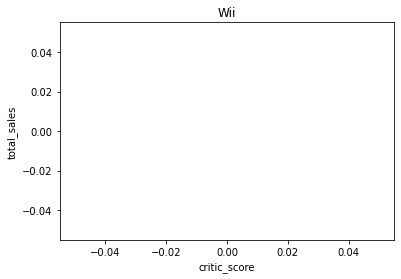

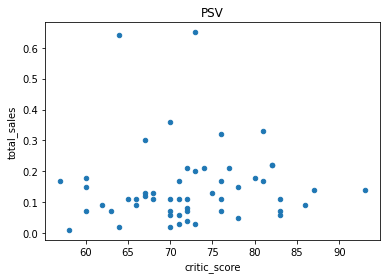

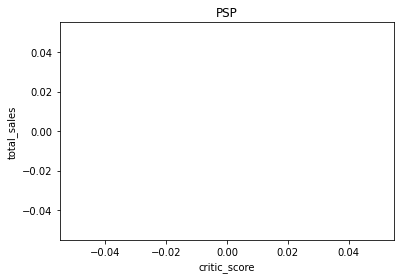

In [111]:
# Построим графики взаимосвязи отзывов критиков и продажами и посчитаем корреляцию:

for item in other_platforms:
    data [data['platform']==item].plot(
        x='critic_score', y='total_sales', kind='scatter', title = item)
    print ('Корреляция между отзывами критиков и продажами для',item, ':', 
           data [data['platform']==item]['critic_score'].corr (data [data['platform']==item]['total_sales']))

**Вывод:** применительно к влиянию отзывов критиков мы видим приблизительно одинаковый коэффициент корреляции Пирсона для разных платформ (около 0,3), что позволяет сделать вывод о том, что в среднем эта взаимосвязь носит слабый характер. Однако есть примеры чуть более сильных (0,5) или более слабых (0.04) взаимосвязей.

Корреляция между отзывами критиков и продажами для 3DS : 0.2151932718527028
Корреляция между отзывами критиков и продажами для XOne : -0.0703839280647581
Корреляция между отзывами критиков и продажами для WiiU : 0.40792645792170773
Корреляция между отзывами критиков и продажами для PS3 : -0.16676141347662118
Корреляция между отзывами критиков и продажами для X360 : -0.138444570945665
Корреляция между отзывами критиков и продажами для PC : -0.07159665703472451
Корреляция между отзывами критиков и продажами для Wii : 1.0
Корреляция между отзывами критиков и продажами для PSV : -0.16845504978064446
Корреляция между отзывами критиков и продажами для PSP : nan


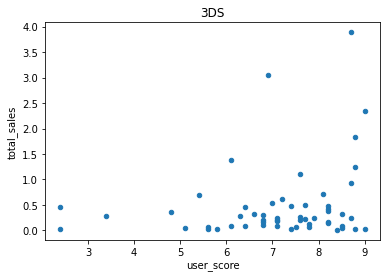

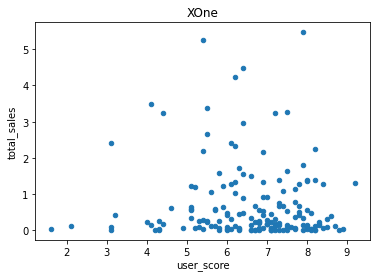

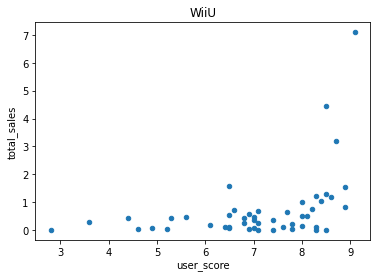

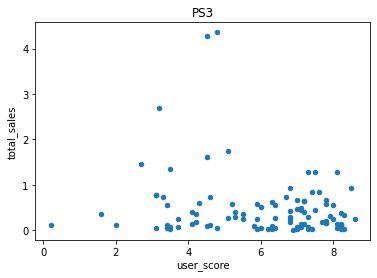

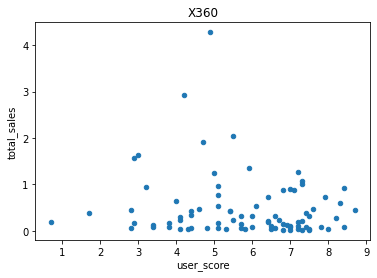

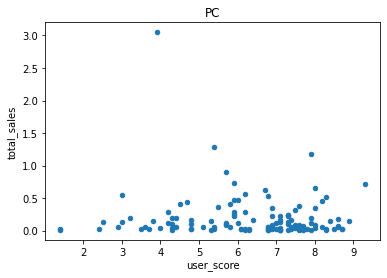

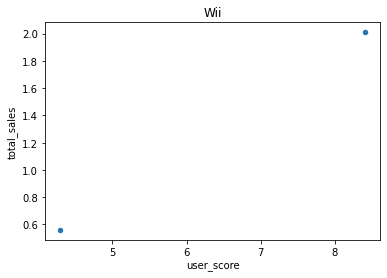

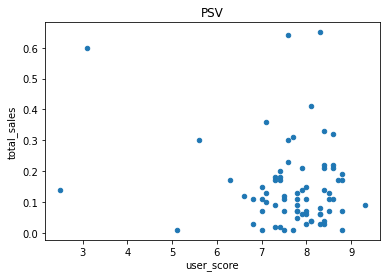

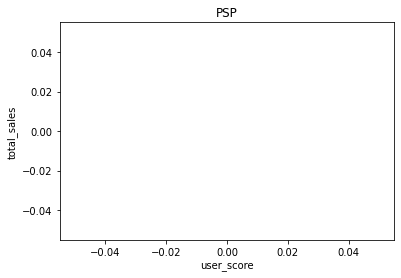

In [112]:
# Построим графики взаимосвязи отзывов пользователей и продаж и посчитаем корреляцию:

for item in other_platforms:
    data [data['platform']==item].plot(
        x='user_score', y='total_sales', kind='scatter', title = item)
    print ('Корреляция между отзывами критиков и продажами для',item, ':', 
           data [data['platform']==item]['user_score'].corr (data [data['platform']==item]['total_sales']))

**Вывод:** что касается взаимосвязи продаж и отзывов пользователей, то здесь ситуация более полярная для различных платформ. Есть как примеры практически отсутствующей взаимосвязи, так и примеры сильной корреляции (например, платформа DS).

### Распределение игр по жанрам и прибыльность жанров

In [113]:
# Выведем на экран информацию о распределении игр по жанрам:

data['genre'].value_counts()

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

Мы видим, что самым распространенным жанром с большим отрывом является экшен, за которым следуют ролевые и приключенческие игры.
Но распространенность жанра не обязательно означает его прибыльность, поэтому необходимо дополнительно исследовать вопрос продаж игр каждого из жанров.

In [114]:
# Выведем на экран информацию о продажах игр каждого жанра:

data.groupby ('genre')['total_sales'].sum()

genre
Action          199.36
Adventure        17.55
Fighting         28.22
Misc             37.55
Platform         18.09
Puzzle            2.21
Racing           27.52
Role-Playing    101.44
Shooter         170.94
Simulation       13.13
Sports          109.48
Strategy          3.96
Name: total_sales, dtype: float64

Больше всего продаж, разумеется, у экшенов (но мы помним, что их и выпущено было в разы больше, чем игр других жанров). За ними следуют шутеры, ролевые и спортивные игры. Однако количество выпущенных игр для разных жанров существенно различается, поэтому правильнее посчитать прибыльность с учетом этих данных.

In [115]:
# Посчитаем для каждого жанра прибыльность с учетом количества выпущенных игр (в расчете на одну игру):

genres = data['genre'].unique()

for item in genres:
    genre_sales = data[data['genre']==item]['total_sales'].sum() / data[data['genre']==item]['genre'].count()
    print ('Прибыльность для жанра', item, 'составляет', genre_sales)

Прибыльность для жанра Shooter составляет 1.33546875
Прибыльность для жанра Action составляет 0.3220678513731825
Прибыльность для жанра Role-Playing составляет 0.4590045248868778
Прибыльность для жанра Sports составляет 0.6799999999999999
Прибыльность для жанра Fighting составляет 0.47033333333333344
Прибыльность для жанра Racing составляет 0.398840579710145
Прибыльность для жанра Misc составляет 0.3323008849557521
Прибыльность для жанра Platform составляет 0.47605263157894756
Прибыльность для жанра Simulation составляет 0.2984090909090909
Прибыльность для жанра Adventure составляет 0.09486486486486487
Прибыльность для жанра Puzzle составляет 0.15785714285714283
Прибыльность для жанра Strategy составляет 0.107027027027027


Мы видим, что несмотря на популярность экшенов, шутеры в более чем 4 раза лучше продаются. Также неплохие продажи из расчета на одну игру у игр-платформеров, файтингов и спортивных игр. Самые низкие продаж показатели у приключенческих игр, стратегий и головоломок.

## **Составьте портрет пользователя каждого региона**

### Северная Америка

Начнем анализ с Северной Америки: определим самые популярные в этом регионе платформы и жанры, а также изучим влияние рейтинга ESRB на продажи.

In [116]:
# Определим самые популярные в Северной Америке платформы:

data.groupby ('platform')['na_sales'].sum().sort_values()

platform
PSP      0.00
Wii      2.08
PSV      2.52
PC       7.23
WiiU    19.36
PS3     22.05
3DS     22.64
X360    28.30
XOne    81.27
PS4     98.61
Name: na_sales, dtype: float64

Самые популярные платформы в Северной Америке - PS4, XOne, X360, 3DS и PS3.

In [117]:
# Определим самые популярные в Северной Америке жанры:

data.groupby ('genre')['na_sales'].sum().sort_values()

genre
Puzzle           0.65
Strategy         0.98
Simulation       2.63
Adventure        5.64
Platform         6.79
Racing           8.74
Fighting        12.43
Misc            15.05
Role-Playing    33.47
Sports          46.13
Action          72.53
Shooter         79.02
Name: na_sales, dtype: float64

Среди жанров самыми популярными оказались экшены, шутеры, спортивные и ролевые игры, а также игры, не относящиеся к рассматриваемым жанрам.

In [118]:
# Выведем на экран количество продаж всех игр, которым был присвоен определенный рейтинг:

na = data.pivot_table (index = 'rating', values = 'na_sales', aggfunc = 'sum')
na ['proportion'] = na ['na_sales'] / na ['na_sales'].sum() * 100
display (na)

,na_sales,proportion
rating,,
E,50.74,17.862423
E10+,33.23,11.698233
M,96.42,33.943533
T,38.95,13.711892
unknown,64.72,22.783919


Мы видим, что около трети проданных в Северной Америке игр получили рейтинг "M" ("Mature"), то есть они предназначены для взрослых старше 17 лет. 17% игр - рейтинг "E" ("Everyone"), по 13% и 11% -  рейтинги "Т" ("Teen" - для лиц старше 13 лет) и "E10+" ("Everyone 10 and older" - для лиц старше 10 лет) соответственно. О рейтингах оставшихся чуть менее 23% игр информации не представлено.

###  Европа

In [119]:
# Определим самые популярные в Европе платформы:

data.groupby ('platform')['eu_sales'].sum().sort_values()

platform
PSP       0.00
Wii       2.59
PSV       3.53
WiiU     13.15
X360     15.49
3DS      16.12
PC       17.97
PS3      25.54
XOne     46.25
PS4     130.04
Name: eu_sales, dtype: float64

Самые популярные платформы в Европе - PS4, XOne, PS3, PC и 3DS.

In [120]:
# Определим самые популярные в Европе жанры:

data.groupby ('genre')['eu_sales'].sum().sort_values()

genre
Puzzle           0.52
Strategy         1.79
Adventure        6.49
Fighting         6.69
Platform         6.80
Simulation       7.30
Misc            12.86
Racing          14.13
Role-Playing    28.17
Sports          45.73
Shooter         65.52
Action          74.68
Name: eu_sales, dtype: float64

В Европе также самым популярным жанром игр является экшены. За ними следуют шутеры, спортивные и ролевые игры, а также гонки.

In [121]:
# Выведем на экран количество продаж в Европе всех игр, которым был присвоен определенный рейтинг:

eu = data.pivot_table (index = 'rating', values = 'eu_sales', aggfunc = 'sum')
eu ['proportion'] = eu ['eu_sales'] / eu ['eu_sales'].sum() * 100
display (eu)

,eu_sales,proportion
rating,,
E,58.06,21.449682
E10+,26.16,9.664549
M,93.44,34.520467
T,34.07,12.586818
unknown,58.95,21.778484


Что касается рейтинга, то ситуация аналогична североамериканской: около трети  игр с рейтингом "M" ("Mature"), 21% у игр с рейтингом "Е", 12% и 9% - у игр с рейтингами "Т" и "Е10+". У почти 22% игр не указан рейтинг.

### Япония

In [122]:
# Определим самые популярные в Японии платформы:

data.groupby ('platform')['jp_sales'].sum().sort_values()

platform
PC       0.00
Wii      0.00
X360     0.08
XOne     0.32
PSP      0.36
WiiU     7.31
PS3     11.22
PSV     14.54
PS4     15.02
3DS     44.24
Name: jp_sales, dtype: float64

Самые популярные платформы в Японии - 3DS, PS4, PSV, PS3 и WiiU.

In [123]:
# Определим самые популярные в Японии жанры:

data.groupby ('genre')['jp_sales'].sum().sort_values()

genre
Puzzle           0.93
Strategy         0.95
Racing           1.76
Simulation       2.31
Platform         2.69
Sports           3.26
Adventure        3.60
Shooter          4.87
Misc             5.61
Fighting         6.37
Action          29.58
Role-Playing    31.16
Name: jp_sales, dtype: float64

Мы видим, что в Японии самым популярным жанром стал не экшен (он на втором месте), а ролевые игры. Пятерку самых популярных жанров замыкают файтинги, прочие игры и шутеры.

In [124]:
# Выведем на экран количество продаж в Японии всех игр, которым был присвоен определенный рейтинг:

jp = data.pivot_table (index = 'rating', values = 'jp_sales', aggfunc = 'sum')
jp ['proportion'] = jp ['jp_sales'] / jp ['jp_sales'].sum() * 100
display (jp)

,jp_sales,proportion
rating,,
E,8.94,9.603609
E10+,4.46,4.791062
M,8.01,8.604576
T,14.78,15.877108
unknown,56.90,61.123644


Распределение продаж в зависимости от рейтинга в Японии также существенно отличается. Более 60% проданных игр вообще не имеют указания на рейтинг ESRB, у 15% рейтинг "Т", у 9% - рейтинг "Е", у 8% - рейтинг "М" и лишь у менее чем 5% рейтинг "Е10+".

## **Проверьте гипотезы**

### "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Сформулируем нулевую гипотезу следующим образом: 

**"Средний пользовательский рейтинг платформы XOne равен среднему пользовательскому рейтингу платформы PC"**.

Альтернативная гипотеза будет выглядеть так: 

**"Средний пользовательский рейтинг платформы XOne не равен среднему пользовательскому рейтингу платформы PC"**.

Поскольку мы имеем дело с двумя генеральными совокупностями, для проверки гипотезы о равенстве их средних необходимо использовать t-test.

In [125]:
# Используем t-test для проверки нулевой гипотезы:

xbox_rating = data[data['platform']=='XOne']['user_score']
pc_rating = data[data['platform']=='PC']['user_score']

alpha = .05

results = st.ttest_ind(xbox_rating, pc_rating, nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не удалось отвергнуть нулевую гипотезу')

p-значение: 0.10450507919348513
Не удалось отвергнуть нулевую гипотезу


T-test показал, что средние рейтинги пользователей платформ платформ Xbox One и PC одинаковы, поскольку вероятность случайно получить такое же значение равна 10%, что не позволяет сделать вывод о значительном различии между средними пользовательскими рейтингами для каждой из платформ.

### "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные"

Сформулируем нулевую гипотезу следующим образом: 

**"Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports"**

Альтернативная гипотеза: 

**"Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports"**

Поскольку мы имеем дело с двумя генеральными совокупностями, для проверки гипотезы о равенстве их средних необходимо использовать t-test.

In [126]:
# Используем t-test для проверки нулевой гипотезы:

action_rating = data[data['genre']=='Action']['user_score']
sports_rating = data[data['genre']=='Sports']['user_score']

alpha = .05

results = st.ttest_ind(action_rating, sports_rating, nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не удалось отвергнуть нулевую гипотезу')

p-значение: 2.8711147985107304e-19
Отвергаем нулевую гипотезу


T-test показал, что средние рейтинги пользователей игр жанров Action и Sports не одинаковы, соответственно, нулевая гипотеза об их равенстве опровергнута. Следовательно, альтернативная гипотеза, вынесенная в задание и подзаголовок, верна.

## **Вывод**

Было проведено исследование закономерностей, влияющих на успешность компьютерных игр. 

**Цель исследования:** выявить, какие факторы влияют на успех компьютерной игры для планирования рекламных кампаний.

Исследование включало в себя различные этапы:

**Шаг 1.** Подготовка данных.   
На данном этапе была осуществлена подготовка данных к дальнейшему исследованию: названия столбцов были приведены к нижнему регистру, скорректированы типы данных, обработаны пропуски и посчитаны суммарные продажи по всем регионам.



**Шаг 2.** Исследовательский анализ данных.   
В первую очередь был проведен анализ динамики релизов игр в разные годы. Для целей анализа было решено использовать данные за актуальный период - 3 года, то есть за период с 2014 по 2016 гг включительно. Анализ показал, что количество выпускаемых игр росло различными темпами с середины 1990-х годов вплоть до 2008-2009 гг, после чего стало наблюдаться падение количества релизов.

Далее был произведен анализ продаж на различных платформах. Лидером по количеству продаж стала платформа PS4 (свыше 280 млн проданных копий), а наименьшее число продаж набрала платформа PSP (менее 360 тыс копий) за рассматриваемый период, что наверняка связано со снятием консолей PSP с продажи в 2011 году и, как следствие, неактуальностью выпускаемых на этой платформе игр. Исследование также выявило, что средний срок жизни платформы составляет 11 лет. 

Дальнейший анализ включал в себя изучение влияния на продажи отзывов (как самих пользователей, так и критиков). Анализ показал, что влияние отзывов критиков на продажи приблизительно одинаково для различных платформ (и в целом не может быть охарактеризовано как существенное), тогда как влияние отзывов пользователей на продажи сильно различается от платформы к платформе и может быть как незначительным, так и очень заметным.

Следующим шагом в исследовательском анализе стало рассмотрение распределения игр по жанрам. Были выявлены самые распространенные жанры (ими стали экшен, ролевые и приключенческие игры), самые прибыльные (шутеры, платформеры и спортивные игры) и наименее прибыльные (приключенческие игры, стратегии и головоломки).



**Шаг 3.** Составление портрета пользователей в различных регионах
Дальнейший анализ предполагал исследование продаж в различных регионах (Северная Америка, Европа и Япония) и составление портрета пользователя для каждого из региона.

Были получены следующие результаты:
- **Северная Америка**: 
    - самые популярные платформы: PS4, XOne, X360, 3DS и PS3.;
    - самые популярные жанры: экшены, шутеры, спортивные и ролевые игры, а также игры, не относящиеся к рассматриваемым жанрам;
    - рейтинг ESRB: преобладают игры с рейтингом "М".
- **Европа**:
    - самые популярные платформы: PS4, XOne, PS3, PC и 3DS;
    - самые популярные жанры: экшены, шутеры, спортивные и ролевые игры, а также симуляторы гонок;
    - рейтинг ESRB: преобладают игры с рейтингом "М".
- **Япония**:
    - самые популярные платформы: 3DS, PS4, PSV, PS3 и WiiU;
    - самые популярные жанры: ролевые игры, экшены, файтинги, игры, не относящиеся к рассматриваемым жанрам и шутеры.
    - рейтинг ESRB: игры с рейтингами "Е", "Т" и "М" представлены практически одинаково, у подавляющего большинства проданных игр не указан рейтинг.
    
    
    
**Шаг 4.** Проверка гипотез.
Для целей исследования было сформулировано две нулевые гипотезы: 

Гипотеза №1: "Средний пользовательский рейтинг платформы XOne равен среднему пользовательскому рейтингу платформы PC";       
Гипотеза №2: "Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports".

Для проверки каждой из гипотез был проведен t-test, который показал следующие результаты: 

Гипотеза №1: не удалось опровергнуть       
Гипотеза №2: была опровергнута
